In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.model_selection import validation_curve
from sklearn import metrics

In [2]:
botw = pd.ExcelFile(r"C:\Users\eadam\Desktop\DSC 680\Weeks 1 - 4\BOTW.xlsx")

In [3]:
Combined = pd.read_excel(r"C:\Users\eadam\Desktop\DSC 680\Weeks 1 - 4\Combined.xlsx")

In [4]:
beasts = 'Monster'
weapons = 'Weapon'

In [5]:
Beasts = botw.parse('Monster')
Beasts.head()

Monster ID   Enemy    Type    HP  Rank
0          49   Lynel  Silver  5000    42
1          48   Lynel   White  4000    38
2          36  Moblin  Silver  1080    34
3          47   Lynel    Blue  3000    34
4          58   Scout      IV  3000    34

In [8]:
Beasts['Monster ID'].nunique()

71

In [9]:
Beasts['Rank'].nunique()

22

In [10]:
Weapons = botw.parse('Weapon')
Weapons.head()

Weapon  Weapon ID  Subclass ID Subclass  Wield Grip  \
0          Moblin Arm         78            2    Heavy           2   
1         Farming Hoe         81            2    Heavy           2   
2            Boat Oar         73            2    Heavy           2   
3      Rusty Claymore         67            2    Heavy           2   
4  Savage Lynel Sword         44            0    Light           1   

   Durability  Strength   D*S   APS  
0           5        15    75  0.82  
1           6        16    96  0.82  
2           8        14   112  0.82  
3          10        12   120  0.82  
4          41        58  2378  2.04

In [11]:
Weapons['Weapon ID'].nunique()

119

In [19]:
Weapons['Subclass'].value_counts()

Light       43
Heavy       39
Pole-arm    37
Name: Subclass, dtype: int64

In [12]:
Combined.head()

Monster ID  Health  Rank  Weapon ID  Subclass ID Subclass  Wield Grip  \
0           1       3     1          1            0    Light           1   
1           2      20     1          1            0    Light           1   
2           3      48     1          1            0    Light           1   
3           4      12     1          1            0    Light           1   
4           5      20     1          1            0    Light           1   

   Durability  Strength  D*S   APS  BW Outcome  
0          80         1   80  2.04           1  
1          80         1   80  2.04           1  
2          80         1   80  2.04           1  
3          80         1   80  2.04           1  
4          80         1   80  2.04           1

# Conducting EDA

In [13]:
Combined.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

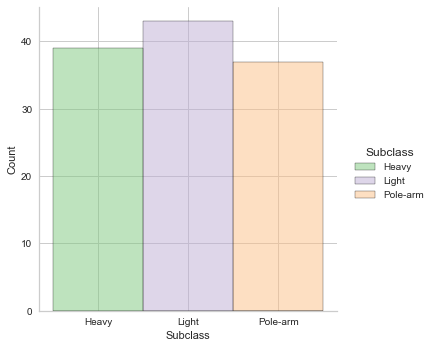

In [14]:
sns.displot(Weapons, x="Subclass", hue='Subclass', palette="Accent")

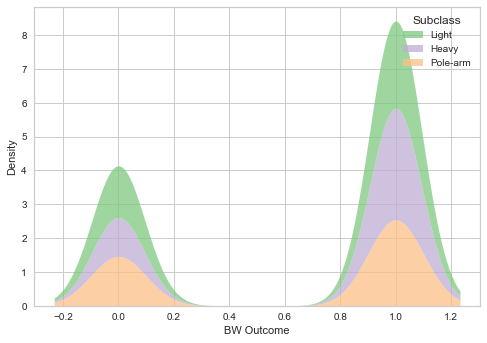

In [18]:
sns.kdeplot(data=Combined, x='BW Outcome', hue='Subclass', multiple='stack', fill=True, 
           common_norm=False, palette="Accent", alpha=0.75, linewidth=0)

plt.show()

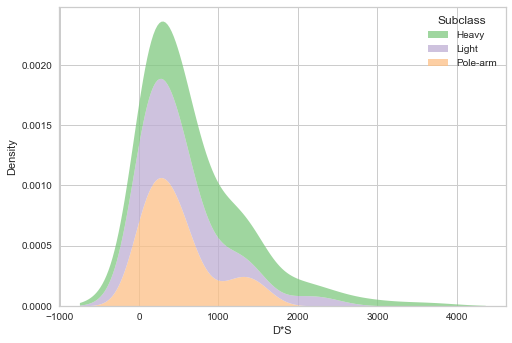

In [79]:
sns.kdeplot(data=Weapons, x='D*S', hue='Subclass', multiple='stack', fill=True, 
           common_norm=False, palette="Accent", alpha=0.75, linewidth=0)

plt.show()

In [11]:
Light = Weapons.loc[Weapons['Subclass']=='Light']

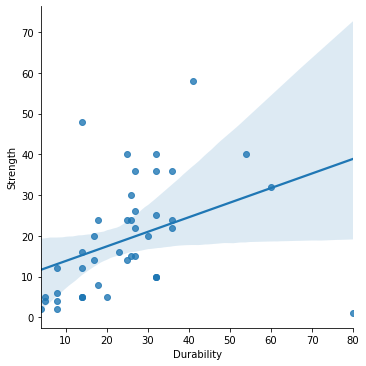

In [12]:
sns.lmplot(data=Light, x='Durability', y='Strength', palette="blend:#7AB,#EDA")

In [13]:
Heavy = Weapons.loc[Weapons['Subclass']=='Heavy']

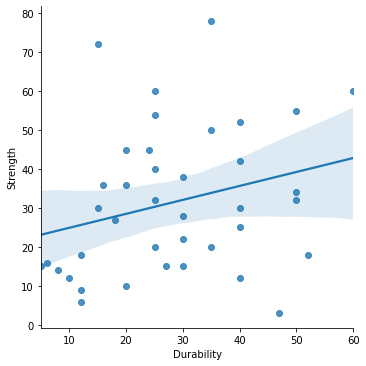

In [14]:
sns.lmplot(data=Heavy, x='Durability', y='Strength', palette="Accent")

In [15]:
PoleArm = Weapons.loc[Weapons['Subclass']=='Pole-arm']

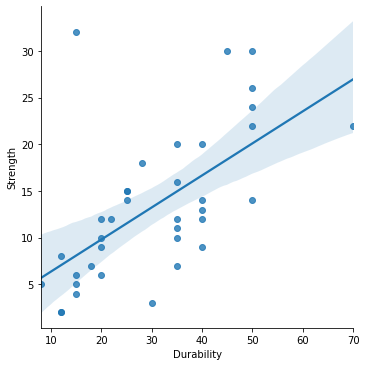

In [16]:
sns.lmplot(data=PoleArm, x='Durability', y='Strength', palette="blend:#7AB,#EDA")

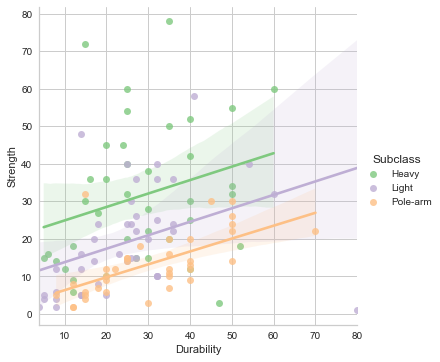

In [58]:
Weapon_lmplot = sns.lmplot(data = Weapons,
                                    x = 'Durability',
                                    y = 'Strength',
                                    hue = 'Subclass',
                                    palette = 'Accent')

# Decision Tree

In [27]:
Combined.head(2)

Monster ID  Health  Rank  Weapon ID  Subclass ID Subclass  Wield Grip  \
0           1       3     1          1            0    Light           1   
1           2      20     1          1            0    Light           1   

   Durability  Strength  D*S   APS  BW Outcome  
0          80         1   80  2.04           1  
1          80         1   80  2.04           1

In [12]:
Target = Combined['Subclass']

In [13]:
Features = Combined.drop(['Subclass', 'Subclass ID'], axis=1)

In [14]:
Features_Train, Features_Test, Target_Train, Target_Test = train_test_split(Features, Target, test_size=0.3)

In [15]:
decisionTree = DecisionTreeClassifier(random_state=0, 
                                      max_depth=4, max_features=3, 
                                      min_samples_split=2)

In [16]:
modelDT = decisionTree.fit(Features_Train, Target_Train)

In [17]:
Target_Predicted = decisionTree.fit(Features_Train, Target_Train).predict(Features_Test)

In [18]:
accuracy = accuracy_score(Target_Test, Target_Predicted, normalize=True)

Accuracy_Percentage = accuracy*100

print('Decision Tree Model Accuracy: ', round(Accuracy_Percentage, 2), '%', sep="")

Decision Tree Model Accuracy: 98.15%


In [19]:
# importing the library for step 6 part 2
from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz
import matplotlib.pyplot as plt

In [20]:
# creating DOT data
dot_data= tree.export_graphviz(decisionTree,
                                out_file=None)


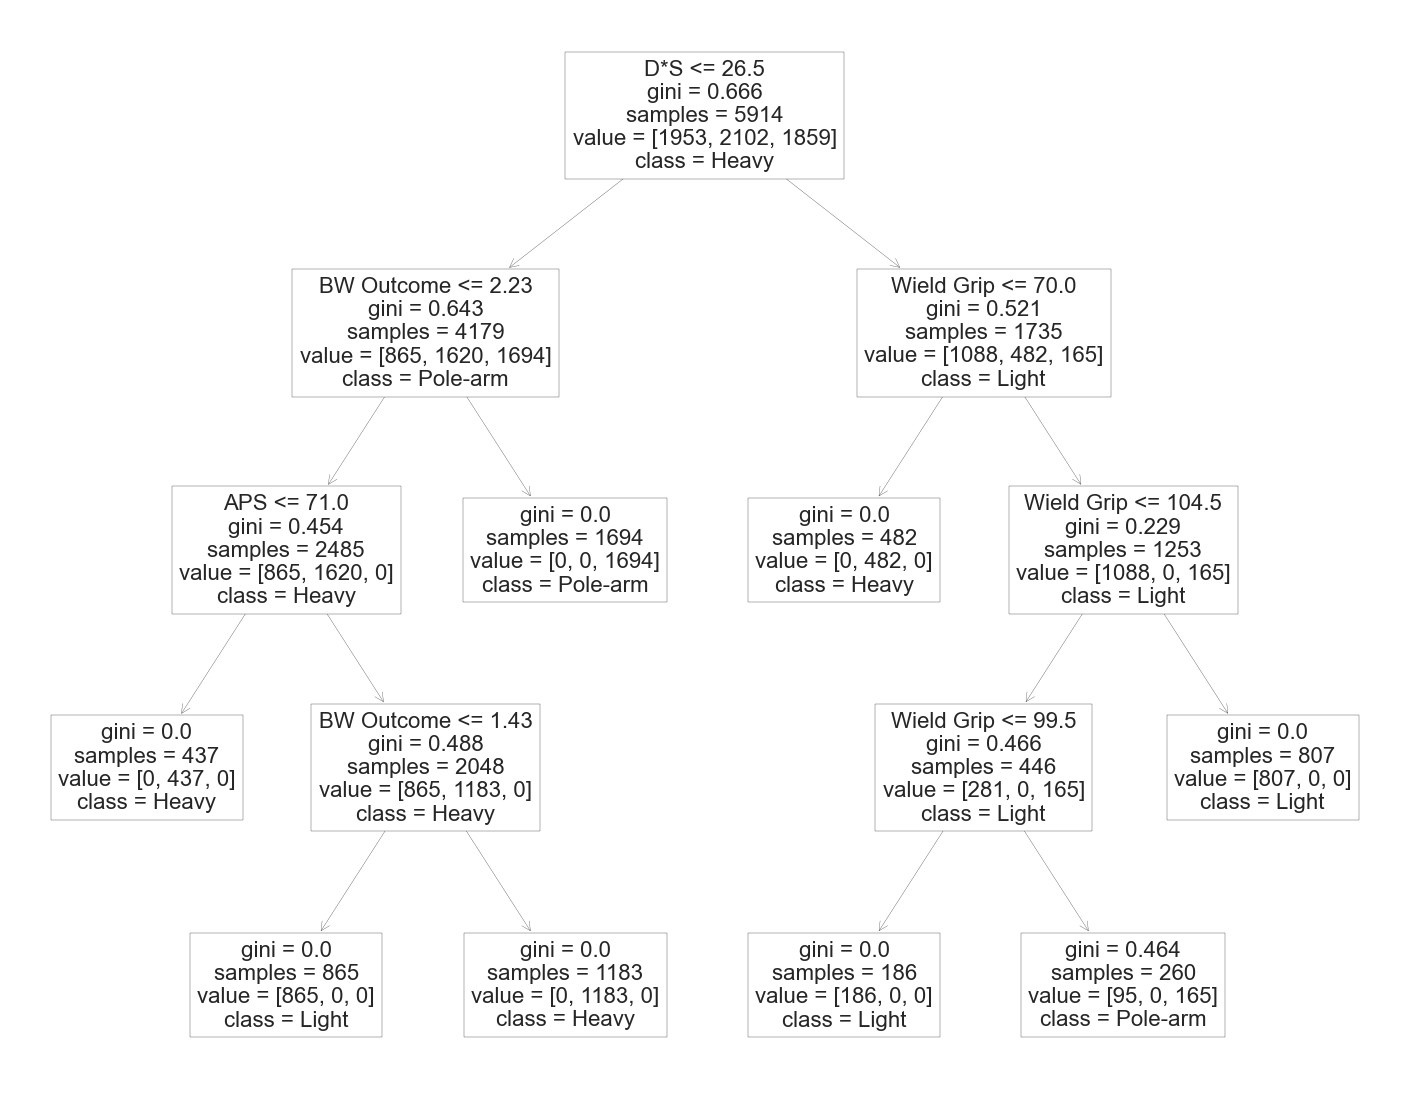

In [21]:
Feature_Names = Combined.columns[3:]
Target_Names = Combined['Subclass'].unique().tolist()

# creating the graphic
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisionTree, feature_names=Feature_Names, class_names=Target_Names, filled=False)

In [22]:
model_Prediction = modelDT.predict(Features_Test)

In [23]:
print(model_Prediction)

['Light' 'Heavy' 'Light' ... 'Pole-arm' 'Light' 'Pole-arm']


In [24]:
print(classification_report(Target_Test,Target_Predicted))

              precision    recall  f1-score   support

       Heavy       1.00      0.94      0.97       816
       Light       1.00      1.00      1.00       951
    Pole-arm       0.94      1.00      0.97       768

    accuracy                           0.98      2535
   macro avg       0.98      0.98      0.98      2535
weighted avg       0.98      0.98      0.98      2535



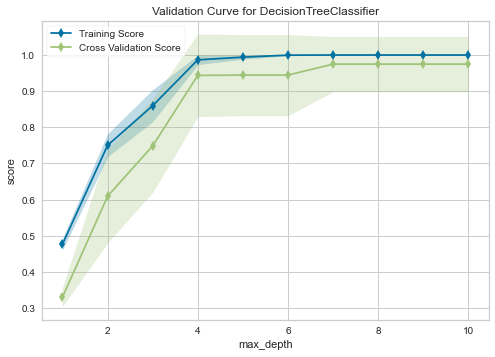

In [25]:
validation_curve(decisionTree, Features, Target, param_name="max_depth", n_jobs=-1,
      param_range=np.arange(1, 11), cv=10, scoring="accuracy")

plt.show()

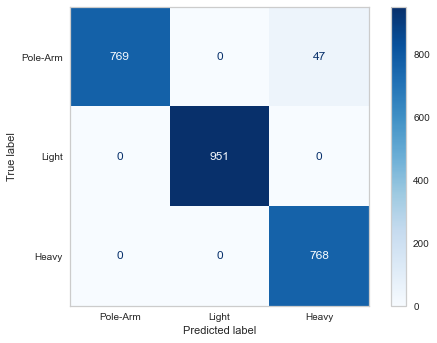

In [28]:
cm = confusion_matrix(Target_Test, Target_Predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Pole-Arm', 'Light', 'Heavy'])

cm_display.plot(cmap='Blues')
plt.grid(False)
plt.show()